<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/colab-Deep-Learning/blob/main/01_%EC%8B%9C%EA%B3%84%EC%97%B4%EC%98%88%EC%B8%A1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 예측문제
- 사인파형 시계형을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

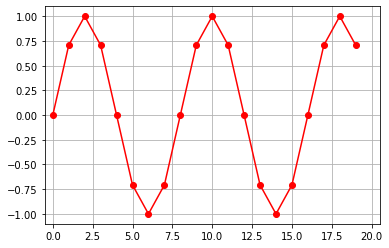

In [3]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

### 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
- Toeplitz 행렬 : 대각선 위의 성분들이 같은 정사각  행렬

In [4]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] -2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [17]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape
# (18, 3, 1)의 의미 : input의 데이터 개수는 18개, 모양은 3,1

((18, 3, 1), (18,))

Text(0.5, 1.0, 'First sample sequence')

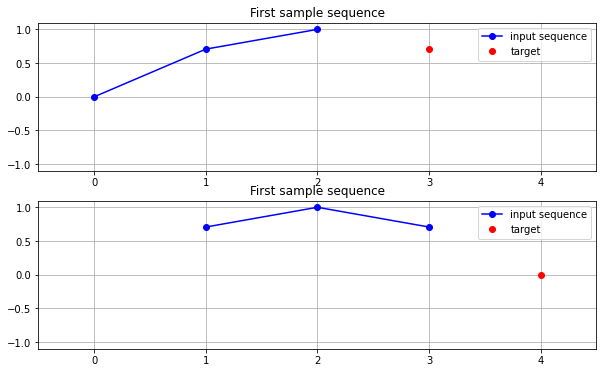

In [12]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3], Y_train[0], 'ro', label='target')
plt.xlim(-0.5,4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], Y_train[1], 'ro', label='target')
plt.xlim(-0.5,4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

### 모델 정의
- SimpleRNN Layer

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [16]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1))) # (18, 3, 1)이였으므로 데이터 18개, 모양은 (3, 1) = X_train.shape[1:]
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='sgd')

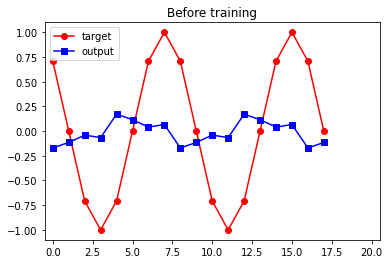

In [20]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [21]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 772ms/step - loss: 0.5104
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4268
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3902
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3569
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3263
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2984
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2729
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2496
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2283
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2089
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1911
Epoch 13/100
1/1 [==============================] - 0s 14

### 결과 확인

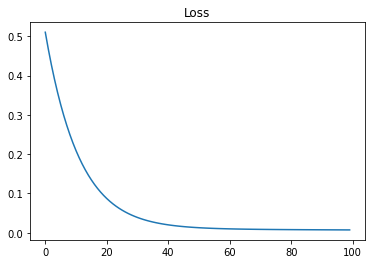

In [22]:
plt.plot(history.history['loss'])
plt.title("Loss")
plt.show()

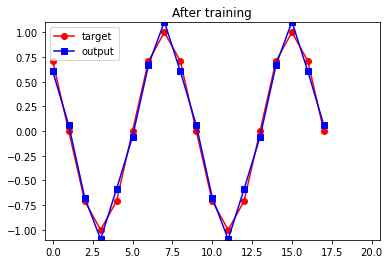

In [24]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [25]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.30862445,  0.7117529 , -0.6130492 , -0.36555988,  0.4611158 ,
         0.37739295, -0.19353554, -0.12169536,  0.3473942 ,  0.5977975 ]],
      dtype=float32)>

In [26]:
# 모델에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[ 0.06934842, -0.260522  , -0.2382448 , -0.2310189 ,  0.49190584,
        -0.38576186, -0.60118014,  0.11631072, -0.12117756,  0.23326336],
       [-0.11500636,  0.7572261 ,  0.27100447, -0.25619426,  0.24075669,
         0.3181762 , -0.22196871,  0.25620675, -0.13122626,  0.2407589 ],
       [ 0.17351423, -0.16972162,  0.40084606, -0.5587735 , -0.02543789,
        -0.01781102,  0.16237575, -0.29325387,  0.5185392 ,  0.2938797 ],
       [-0.32906324, -0.05366785,  0.16397947,  0.14567748, -0.0062977 ,
         0.25066757, -0.53531605, -0.6660146 , -0.00197653, -0.19932783],
       [ 0.03410033,  0.432653  , -0.2144774 , -0.51093405, -0.2560388 ,
        -0.45378494,  0.08882508, -0.34057575, -0.24174643, -0.32794157],
       [ 0.2194342 ,  0.28148443, -0.13897175,  0.26526195,  0.44898033,
        -0.06334534, -0.01309646, -0.06822743,  0.6119689 , -0.4041945 ],
       [-0.03226448,

In [27]:
# bias
model.weights[2]

<tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(10,) dtype=float32, numpy=
array([-0.0046956 ,  0.00101527, -0.00204912,  0.00203127, -0.00357565,
       -0.00351529, -0.0044837 ,  0.00127765, -0.00156704, -0.00880719],
      dtype=float32)>

In [29]:
# output layer에 대한 weights
model.weights[3]

<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[-0.69742364],
       [-0.42091635],
       [-0.7378103 ],
       [ 0.64538383],
       [ 0.7566348 ],
       [ 0.71418303],
       [-0.22637266],
       [ 0.4049217 ],
       [-0.39985362],
       [-0.19067319]], dtype=float32)>

In [ ]:
# 입력에 대한 weights
model.weights[4]